In [1]:
!pip3 install vaderSentiment

     |████████████████████████████████| 133kB 8.3MB/s 


In [20]:
import gc
import numpy as np
import pandas as pd
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,FeatureUnion
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from nltk.cluster import KMeansClusterer,cosine_distance, euclidean_distance
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [3]:
gc.set_threshold(20,5,5)
gc.collect()

0

In [4]:
stop_words = text.ENGLISH_STOP_WORDS.union(['00', '10', '100', '12', '15', '16', '20', '200', '24', '25',\
       '2nd', '30', '40', '45', '50', '60', '75', '80', '90','!',"''","'m","'s",',','.','...','He','I','It','My','Of','``',\
        '!',"''","'m","'re","'s",',','-','.','...','9','An','Ca','Do','I','It','S.','``','!',"''","'s",'(',')',',','-','.',\
        'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y','&',"'ll",'-D','5',':','?',\
        "'", '0', '1', '2', '3', '4', '6', '7', '8', 'A', 'C', 'D', 'H', 'M', 'O', 'S', '`','#',"'ve",'*','--','..','....','10/10','4/5',';',\
        'As','At','HE','IS','IT','If','In','MY','No','ON','On','PR','SO','So','St','To','US','We','/', 'E', 'N', 'P', 'R', 'T', 'U', 'W', 'Y',\
        '$','%',"'S","'d",'.....','1/2','1/3','105','12-lead','125','14','150','198','1\\23\\18','22','221','27','3-3.5','35','AM','Be','By',\
        'CK','DJ','De','Dr','HM','JE','K.','L','MB','Mr','Ms','R.','TO','W.','YA','B', 'J', 'K', '\\','@','Im','Me','Is'])

In [5]:
vectorized_train_data=pd.read_csv('/content/drive/My Drive/amazon_reviews_project/vectorized_train_data.csv')

In [6]:
vectorized_train_data.head(2)

,<,>,OK,Oh,abil,abl,about.,absolut,absolut love,absolut love thi,abus,accept,access,account,accur,act,action,action.,activ,actual,ad,add,addict,addit,admit,ador,adult,advanc,adventur,advertis,advic,again.,age,ago,ago.,agre,all.,allow,alon,alpha,...,wish,wish wa,wit,witti,wo,wo n't,woman,women,wonder,wonder book,wonder stori,word,work,work.,world,world.,worst,worth,worth read,wow,wrap,write,write style,write thi,writer,writer.,writing.,written,written book,written.,wrong,wrote,ye,year,year ago,year old,years.,you.,young,younger
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.464864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X_train=vectorized_train_data
y_train=pd.read_csv('/content/drive/My Drive/amazon_reviews_project/y_train')

Let's take a look at how the ratings are distributed.

In [8]:
y_train.value_counts(normalize=True)

overall
5          0.692554
4          0.173170
3          0.067026
1          0.036020
2          0.031230
dtype: float64

So guessing a rating of 5 will be accurate ~69% of the time. This is our null model.

In [9]:
tree=DecisionTreeClassifier()
pipe=make_pipeline(tree)

In [10]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [11]:
params={
    'decisiontreeclassifier__max_depth':[17],
    'decisiontreeclassifier__max_features':[500,1000],
    'decisiontreeclassifier__criterion':['entropy']
}

In [12]:
gs=GridSearchCV(pipe,params)

In [13]:
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                   

In [14]:
gs.score(X_train,y_train)

0.712484

In [16]:
X_test=pd.read_csv('/content/drive/My Drive/amazon_reviews_project/vectorized_test_data.csv')

In [17]:
y_test=pd.read_csv('/content/drive/My Drive/amazon_reviews_project/y_test')

In [18]:
gs.score(X_test,y_test)

0.69168

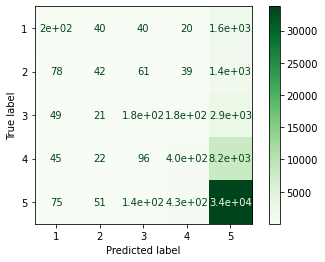

In [19]:
plot_confusion_matrix(gs,X_test,y_test,cmap='Greens')

In [21]:
y_test_preds=gs.predict(X_test)

In [26]:
print('\tClassification Report for Decision Tree\n')
print(classification_report(y_test, y_test_preds))

	Classification Report for Decision Tree

              precision    recall  f1-score   support

           1       0.44      0.11      0.17      1859
           2       0.24      0.03      0.05      1592
           3       0.34      0.05      0.09      3343
           4       0.38      0.05      0.08      8744
           5       0.71      0.98      0.82     34462

    accuracy                           0.69     50000
   macro avg       0.42      0.24      0.24     50000
weighted avg       0.60      0.69      0.59     50000



It appears the model does best when rating 5. Otherwise it is no better than the null model.